# Churn Prediction 

In [84]:
# Churn prediction

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score



In [85]:
# Importing the dataset
df_transactions = pd.read_csv('Retail_Data_Transactions.csv')
df_responses = pd.read_csv('Retail_Data_Response.csv')

In [86]:
#Exploring the data
display(df_transactions.head())
display(df_responses.head())

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1


In [87]:
display(df_transactions.info())
display(df_transactions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


None

,tran_amount
count,125000.000000
mean,64.991912
std,22.860006
min,10.000000
25%,47.000000
50%,65.000000
75%,83.000000
max,105.000000


In [88]:
display(df_responses.info())
display(df_responses.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  6884 non-null   object
 1   response     6884 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 107.7+ KB


None

,response
count,6884.000000
mean,0.093986
std,0.291831
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [89]:
#check if customer_id in both datasets are the same
print(df_transactions['customer_id'].nunique())
print(df_responses['customer_id'].nunique())


6889
6884


In [90]:
#show the difference between of customer_id the two datasets
print(set(df_transactions['customer_id']) - set(df_responses['customer_id']))

{'CS7413', 'CS7297', 'CS7638', 'CS8376', 'CS8753'}


In [91]:
customers = ['CS8376', 'CS8753', 'CS7413', 'CS7638', 'CS7297']
df_transactions[df_transactions['customer_id'].isin(customers)]


,customer_id,trans_date,tran_amount
100300,CS7297,07-Nov-11,49
100365,CS7638,19-Aug-12,63
100996,CS7297,03-Mar-13,77
102431,CS7413,01-Oct-12,67
104425,CS8376,18-Oct-12,36
104827,CS7297,24-May-11,50
106334,CS7297,19-Nov-11,42
106473,CS7638,30-Jan-12,18
106842,CS7638,27-Jul-12,78
107637,CS8753,22-Nov-12,30


In [92]:
# Merge the datasets on customer_id (using an outer join)
combined_data = pd.merge(df_transactions, df_responses, on='customer_id', how='outer')

In [93]:
# Display the merged data
display(combined_data.head())
display(combined_data.info())
display(combined_data.describe())

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS5295,25-Nov-14,54,1.0
2,CS5295,22-May-13,37,1.0
3,CS5295,24-Dec-12,36,1.0
4,CS5295,22-Mar-13,98,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 124999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  125000 non-null  object 
 1   trans_date   125000 non-null  object 
 2   tran_amount  125000 non-null  int64  
 3   response     124969 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ MB


None

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [94]:
#check for missing values
print(combined_data.isnull().sum())


customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64


In [95]:
#change data type of date to datetime in combined_data
combined_data['trans_date'] = pd.to_datetime(combined_data['trans_date'])

#check min and max date
print(combined_data['trans_date'].min())
print(combined_data['trans_date'].max())



2011-05-16 00:00:00
2015-03-16 00:00:00


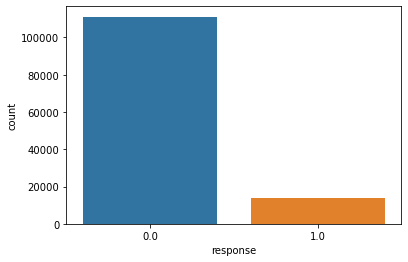

In [96]:
#show distribution of response
sns.countplot(x='response', data=combined_data)
plt.show()

In [97]:
# show data of response 0
display(combined_data[combined_data['response'] == 0])

# show data of response 1
display(combined_data[combined_data['response'] == 1])


,customer_id,trans_date,tran_amount,response
51,CS2122,2013-02-26,52,0.0
52,CS2122,2012-02-20,90,0.0
53,CS2122,2012-10-21,83,0.0
54,CS2122,2012-10-22,91,0.0
55,CS2122,2012-03-10,43,0.0
...,...,...,...,...
124995,CS8077,2011-09-18,51,0.0
124996,CS8077,2014-12-02,27,0.0
124997,CS8077,2011-08-28,30,0.0
124998,CS8077,2015-03-01,19,0.0


,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1.0
1,CS5295,2014-11-25,54,1.0
2,CS5295,2013-05-22,37,1.0
3,CS5295,2012-12-24,36,1.0
4,CS5295,2013-03-22,98,1.0
...,...,...,...,...
123974,CS8081,2014-03-03,26,1.0
123975,CS8081,2011-10-10,76,1.0
123976,CS8081,2013-01-31,71,1.0
123977,CS8081,2014-08-18,22,1.0


In [98]:
#describe the data of response 0 and 1
display(combined_data[combined_data['response'] == 0].describe())
display(combined_data[combined_data['response'] == 1].describe())

,tran_amount,response
count,111127.000000,111127.0
mean,64.492248,0.0
std,23.002691,0.0
min,10.000000,0.0
25%,47.000000,0.0
50%,64.000000,0.0
75%,83.000000,0.0
max,105.000000,0.0


,tran_amount,response
count,13842.000000,13842.0
mean,69.032510,1.0
std,21.254825,0.0
min,10.000000,1.0
25%,51.000000,1.0
50%,69.000000,1.0
75%,87.000000,1.0
max,105.000000,1.0


In [99]:
#show customer_id CS2122 and CS5295 with sorted by trans_date show in different dataframe


# filter transactions for customer_id CS2122 and sort by trans_date
df_CS2122 = combined_data[combined_data['customer_id'] == 'CS2122'].sort_values('trans_date')
display(df_CS2122)

# filter transactions for customer_id CS5295 and sort by trans_date
df_CS5295 = combined_data[combined_data['customer_id'] == 'CS5295'].sort_values('trans_date')
display(df_CS5295)




,customer_id,trans_date,tran_amount,response
58,CS2122,2011-10-28,39,0.0
52,CS2122,2012-02-20,90,0.0
55,CS2122,2012-03-10,43,0.0
69,CS2122,2012-04-02,69,0.0
65,CS2122,2012-08-20,93,0.0
68,CS2122,2012-09-29,105,0.0
53,CS2122,2012-10-21,83,0.0
54,CS2122,2012-10-22,91,0.0
72,CS2122,2013-01-04,94,0.0
51,CS2122,2013-02-26,52,0.0


,customer_id,trans_date,tran_amount,response
16,CS5295,2011-10-27,104,1.0
17,CS5295,2011-11-07,67,1.0
22,CS5295,2011-11-16,65,1.0
14,CS5295,2012-01-03,60,1.0
6,CS5295,2012-01-08,77,1.0
8,CS5295,2012-02-26,65,1.0
10,CS5295,2012-05-02,40,1.0
24,CS5295,2012-05-30,91,1.0
5,CS5295,2012-06-03,96,1.0
15,CS5295,2012-08-22,37,1.0


In [100]:

# filter transactions for customer_id CS2122 and sort by trans_date
df_CS8077 = combined_data[combined_data['customer_id'] == 'CS8077'].sort_values('trans_date')
display(df_CS8077)

# filter transactions for customer_id CS5295 and sort by trans_date
df_CS8081 = combined_data[combined_data['customer_id'] == 'CS8081'].sort_values('trans_date')
display(df_CS8081)


,customer_id,trans_date,tran_amount,response
124997,CS8077,2011-08-28,30,0.0
124995,CS8077,2011-09-18,51,0.0
124999,CS8077,2013-01-13,37,0.0
124996,CS8077,2014-12-02,27,0.0
124998,CS8077,2015-03-01,19,0.0


,customer_id,trans_date,tran_amount,response
123975,CS8081,2011-10-10,76,1.0
123967,CS8081,2011-11-07,33,1.0
123976,CS8081,2013-01-31,71,1.0
123970,CS8081,2013-10-01,23,1.0
123969,CS8081,2013-10-13,25,1.0
123972,CS8081,2013-10-18,51,1.0
123965,CS8081,2014-01-03,58,1.0
123968,CS8081,2014-01-27,58,1.0
123974,CS8081,2014-03-03,26,1.0
123964,CS8081,2014-03-17,56,1.0


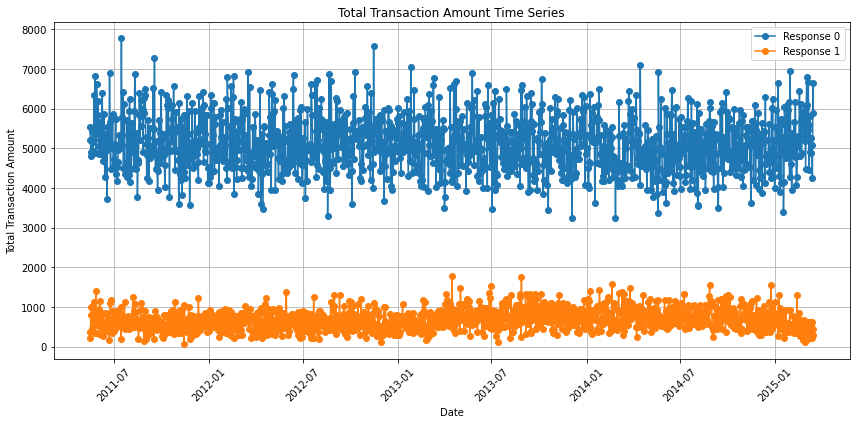

In [101]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter data for response values 0 and 1
response_0_data = combined_data[combined_data['response'] == 0]
response_1_data = combined_data[combined_data['response'] == 1]

# Group data by 'trans_date' and calculate the sum of transaction amounts for each day
response_0_daily_amount = response_0_data.groupby(response_0_data['trans_date'].dt.date)['tran_amount'].sum()
response_1_daily_amount = response_1_data.groupby(response_1_data['trans_date'].dt.date)['tran_amount'].sum()

# Convert the index to a numpy array before indexing
response_0_dates = response_0_daily_amount.index.values
response_1_dates = response_1_daily_amount.index.values

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(response_0_dates, response_0_daily_amount.values, label='Response 0', marker='o')
plt.plot(response_1_dates, response_1_daily_amount.values, label='Response 1', marker='o')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount Time Series')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


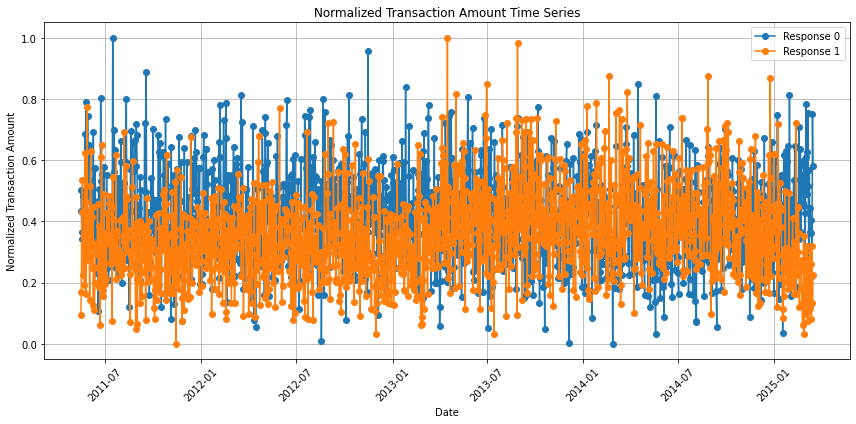

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



# Normalize the transaction amounts using Min-Max scaling
scaler = MinMaxScaler()
response_0_amount_normalized = scaler.fit_transform(response_0_daily_amount.values.reshape(-1, 1))
response_1_amount_normalized = scaler.fit_transform(response_1_daily_amount.values.reshape(-1, 1))

# Convert the index to a numpy array before indexing
response_0_dates = response_0_daily_amount.index.to_numpy()
response_1_dates = response_1_daily_amount.index.to_numpy()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(response_0_dates, response_0_amount_normalized, label='Response 0', marker='o')
plt.plot(response_1_dates, response_1_amount_normalized, label='Response 1', marker='o')
plt.xlabel('Date')
plt.ylabel('Normalized Transaction Amount')
plt.title('Normalized Transaction Amount Time Series')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


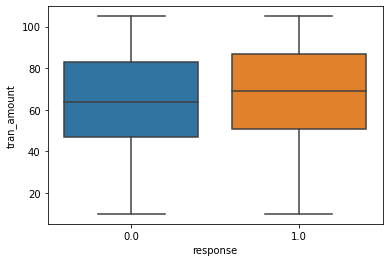

In [103]:
#boxplot of response and tran_amount
sns.boxplot(x='response', y='tran_amount', data=combined_data)
plt.show()


At first I tried to find out that 0 and 1 is about churn or not then I figured out that it is campaign response.After doing the EDA in both responses, it seems that average transaction amount in group 1 is slightly higher that group 0. And I assume 5 people that didn't response should be 0 since the column 'response' is campaign response

In [104]:
#fill missing values in response with 0
combined_data['response'] = combined_data['response'].fillna(0)

#check if there is any missing values
print(combined_data.isnull().sum())

customer_id    0
trans_date     0
tran_amount    0
response       0
dtype: int64


Using the provided information, it can be inferred that the transaction data was collected between May 16, 2011, and March 16, 2015.. As a result,the RFM value of a user will be evaluated for the past four years, encompassing all of the user's transaction history since their initial purchase.

# RFM

In [105]:
import pandas as pd
from datetime import datetime

# Create a new DataFrame to store the grouped data
grouped_data = combined_data.copy()

# Convert 'trans_date' to datetime format
grouped_data['trans_date'] = pd.to_datetime(grouped_data['trans_date'])

# Sort the data by datetime and customer_id
grouped_data.sort_values(['customer_id', 'trans_date'], inplace=True)

# Calculate time since last transaction for each customer
grouped_data['time_since_last_transaction'] = grouped_data.groupby('customer_id')['trans_date'].diff().dt.days

# Calculate the time between each transaction for each customer
grouped_data['time_between_transactions'] = grouped_data.groupby('customer_id')['trans_date'].diff().dt.days

# Calculate the last transaction date in the dataset
last_transaction_date = grouped_data['trans_date'].max()

# Calculate the recency feature
grouped_data['recency'] = (last_transaction_date - grouped_data['trans_date']).dt.days

# Group data by 'customer_id'
grouped_data = grouped_data.groupby('customer_id')

# Calculate total transaction count, total transaction amount, average transaction amount, standard deviation of transaction amounts, recency, average time between transactions, and response
aggregated_data = grouped_data.agg(
    total_transaction_count=('tran_amount', 'count'),
    #total_transaction_amount=('tran_amount', 'sum'),
    average_transaction_amount=('tran_amount', 'mean'),
    #std_transaction_amount=('tran_amount', 'std'),
    time_since_last_transaction=('time_since_last_transaction', 'last'),
    #recency=('recency', 'last'),
    #avg_time_between_transactions=('time_between_transactions', 'mean'),  # Calculate average time between transactions
    response=('response', 'first')  # Include the 'response' column
)

# Reset the index to convert 'customer_id' back to a column
aggregated_data.reset_index(inplace=True)

# Display the final feature-engineered DataFrame
aggregated_data


,customer_id,total_transaction_count,average_transaction_amount,time_since_last_transaction,response
0,CS1112,15,67.466667,41.0,0.0
1,CS1113,20,74.500000,0.0,0.0
2,CS1114,19,75.368421,43.0,1.0
3,CS1115,22,75.409091,260.0,1.0
4,CS1116,13,65.923077,78.0,1.0
...,...,...,...,...,...
6884,CS8996,13,44.769231,11.0,0.0
6885,CS8997,14,38.785714,127.0,0.0
6886,CS8998,13,48.000000,61.0,0.0
6887,CS8999,12,31.916667,98.0,0.0


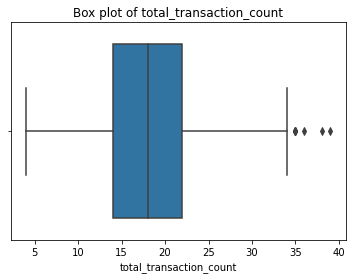

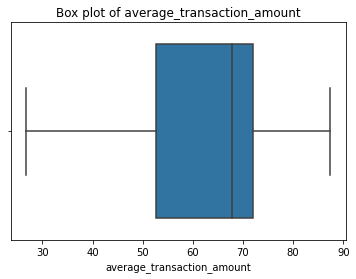

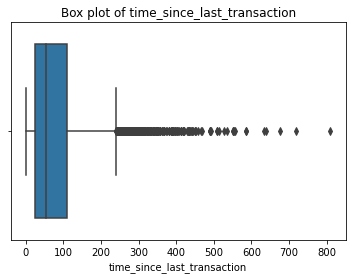

In [106]:
import pandas as pd
import seaborn as sns

# Assuming 'aggregated_data' is the dataframe containing the columns 'total_transaction_count', 'total_transaction_amount', 'average_transaction_amount', 'time_since_last_transaction', 'recency', and 'avg_time_between_transactions'

# Create a box plot for 'total_transaction_count'
sns.boxplot(x=aggregated_data['total_transaction_count'])
plt.title('Box plot of total_transaction_count')
plt.show()

# # Create a box plot for 'total_transaction_amount'
# sns.boxplot(x=aggregated_data['total_transaction_amount'])
# plt.title('Box plot of total_transaction_amount')
# plt.show()

# Create a box plot for 'average_transaction_amount'
sns.boxplot(x=aggregated_data['average_transaction_amount'])
plt.title('Box plot of average_transaction_amount')
plt.show()

# Create a box plot for 'time_since_last_transaction'
sns.boxplot(x=aggregated_data['time_since_last_transaction'])
plt.title('Box plot of time_since_last_transaction')
plt.show()

# # Create a box plot for 'recency'
# sns.boxplot(x=aggregated_data['recency'])
# plt.title('Box plot of recency')
# plt.show()

# # Create a box plot for 'avg_time_between_transactions'
# sns.boxplot(x=aggregated_data['avg_time_between_transactions'])
# plt.title('Box plot of avg_time_between_transactions')
# plt.show()


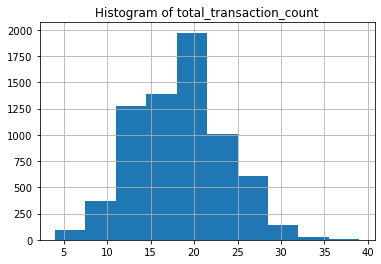

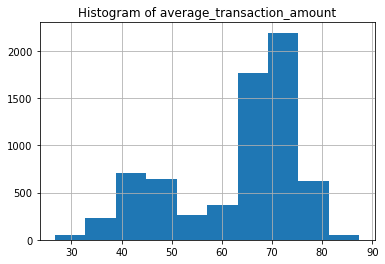

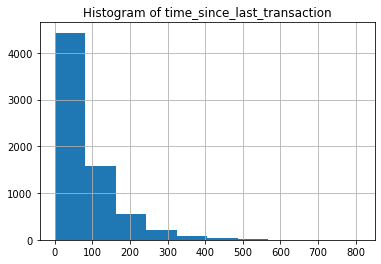

In [107]:

# Create a histogram for 'total_transaction_count'
aggregated_data['total_transaction_count'].hist()
plt.title('Histogram of total_transaction_count')
plt.show()

# # Create a histogram for 'total_transaction_amount'
# aggregated_data['total_transaction_amount'].hist()
# plt.title('Histogram of total_transaction_amount')
# plt.show()

# Create a histogram for 'average_transaction_amount'
aggregated_data['average_transaction_amount'].hist()
plt.title('Histogram of average_transaction_amount')
plt.show()

# Create a histogram for 'time_since_last_transaction'
aggregated_data['time_since_last_transaction'].hist()
plt.title('Histogram of time_since_last_transaction')
plt.show()

# # Create a histogram for 'recency'
# aggregated_data['recency'].hist()
# plt.title('Histogram of recency')
# plt.show()

# # Create a histogram for 'avg_time_between_transactions'
# aggregated_data['avg_time_between_transactions'].hist()
# plt.title('Histogram of avg_time_between_transactions')
# plt.show()


<AxesSubplot:>

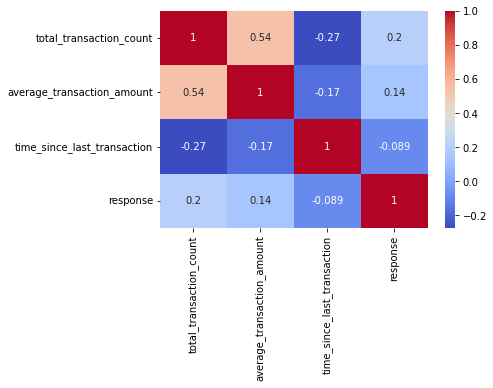

In [108]:
# Drop the 'customer_id' column from the 'aggregated_data' dataframe
aggregated_data_no_id = aggregated_data.drop('customer_id', axis=1)

# Plot the correlation heatmap
sns.heatmap(aggregated_data_no_id.corr(), annot=True, cmap='coolwarm')


In [109]:
# describe the data of response 0 and 1
display(aggregated_data[aggregated_data['response'] == 0].describe())
display(aggregated_data[aggregated_data['response'] == 1].describe())


,total_transaction_count,average_transaction_amount,time_since_last_transaction,response
count,6242.000000,6242.000000,6242.000000,6242.0
mean,17.808074,62.517429,81.858859,0.0
std,5.157480,12.671633,82.620173,0.0
min,4.000000,26.700000,0.000000,0.0
25%,14.000000,50.728788,24.000000,0.0
50%,18.000000,67.352941,56.000000,0.0
75%,21.000000,71.866667,113.000000,0.0
max,39.000000,87.400000,810.000000,0.0


,total_transaction_count,average_transaction_amount,time_since_last_transaction,response
count,647.000000,647.000000,647.000000,647.0
mean,21.394127,68.577323,57.287481,1.0
std,4.346540,7.869590,52.745820,0.0
min,5.000000,28.272727,0.000000,1.0
25%,19.000000,66.666667,19.000000,1.0
50%,21.000000,69.789474,42.000000,1.0
75%,24.000000,73.000000,81.500000,1.0
max,38.000000,84.562500,299.000000,1.0


# Model Creation and Evaluation

In [110]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import itertools


In [111]:
X = pd.concat([aggregated_data[['total_transaction_count', 'average_transaction_amount', 'time_since_last_transaction']]], axis=1) # 'total_transaction_amount', 'recency',  'avg_time_between_transactions'
y = aggregated_data['response']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

Model: Random Forest
--------------------------------------------------
No Resampling (Baseline):


              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      2485
         1.0       0.10      0.01      0.03       271

    accuracy                           0.89      2756
   macro avg       0.50      0.50      0.48      2756
weighted avg       0.82      0.89      0.85      2756



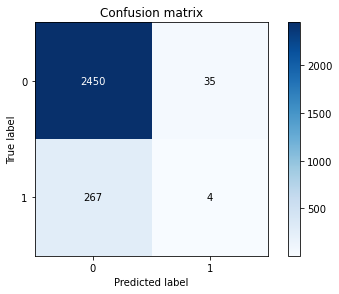

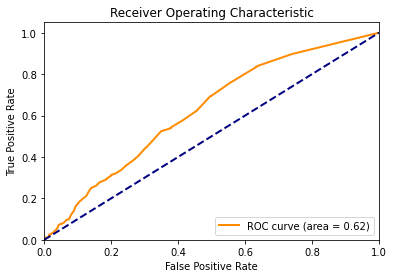


SMOTE Resampling:
Class distribution after SMOTE: Counter({0.0: 3757, 1.0: 3757})
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      2485
         1.0       0.14      0.29      0.18       271

    accuracy                           0.75      2756
   macro avg       0.52      0.54      0.52      2756
weighted avg       0.84      0.75      0.79      2756



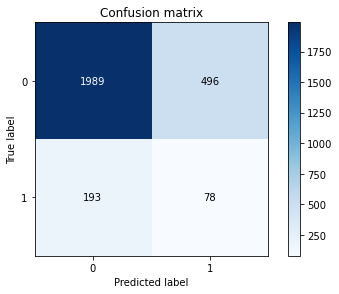

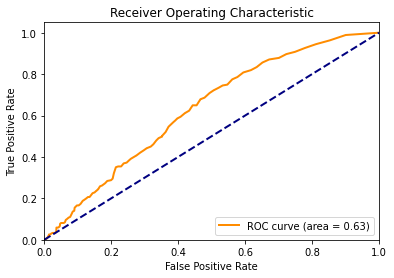


Random Under-Sampling:
Class distribution after under-sampling: Counter({0.0: 376, 1.0: 376})
              precision    recall  f1-score   support

         0.0       0.93      0.61      0.74      2485
         1.0       0.14      0.60      0.23       271

    accuracy                           0.61      2756
   macro avg       0.54      0.61      0.48      2756
weighted avg       0.86      0.61      0.69      2756



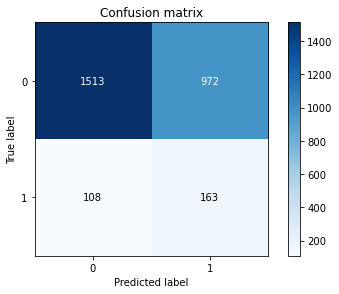

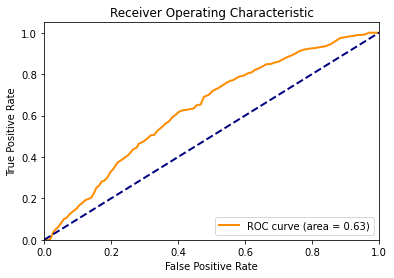


Random Over-Sampling:
Class distribution after over-sampling: Counter({0.0: 3757, 1.0: 3757})
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93      2485
         1.0       0.13      0.07      0.09       271

    accuracy                           0.86      2756
   macro avg       0.52      0.51      0.51      2756
weighted avg       0.83      0.86      0.84      2756



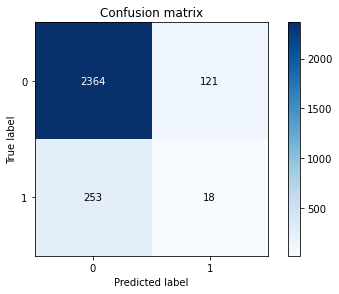

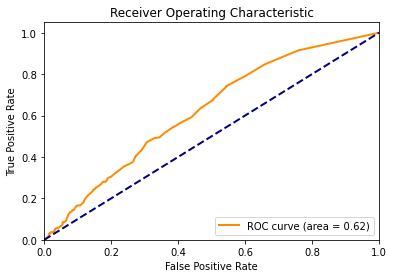


Model: Gradient Boosting
--------------------------------------------------
No Resampling (Baseline):
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      2485
         1.0       0.00      0.00      0.00       271

    accuracy                           0.90      2756
   macro avg       0.45      0.50      0.47      2756
weighted avg       0.81      0.90      0.85      2756



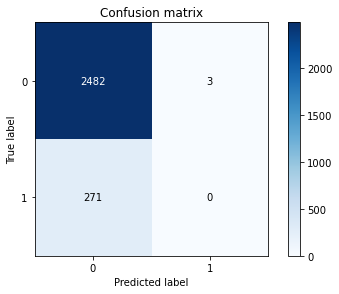

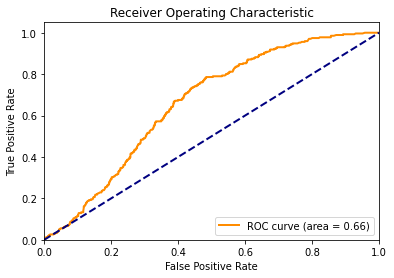


SMOTE Resampling:
Class distribution after SMOTE: Counter({0.0: 3757, 1.0: 3757})
              precision    recall  f1-score   support

         0.0       0.94      0.63      0.75      2485
         1.0       0.15      0.60      0.24       271

    accuracy                           0.62      2756
   macro avg       0.54      0.61      0.49      2756
weighted avg       0.86      0.62      0.70      2756



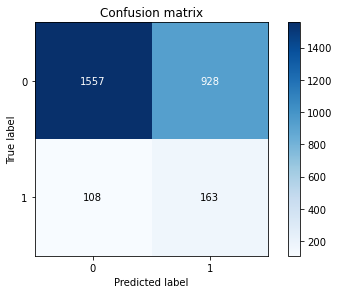

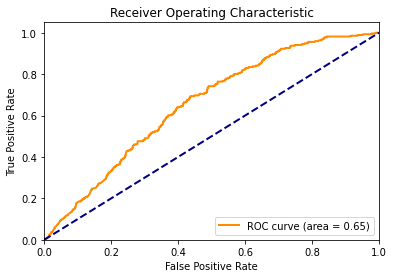


Random Under-Sampling:
Class distribution after under-sampling: Counter({0.0: 376, 1.0: 376})
              precision    recall  f1-score   support

         0.0       0.94      0.57      0.71      2485
         1.0       0.14      0.67      0.24       271

    accuracy                           0.58      2756
   macro avg       0.54      0.62      0.47      2756
weighted avg       0.86      0.58      0.66      2756



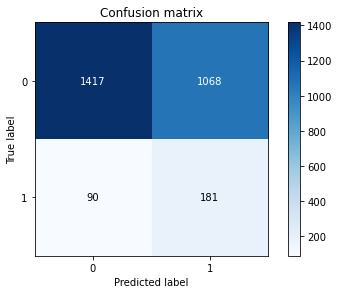

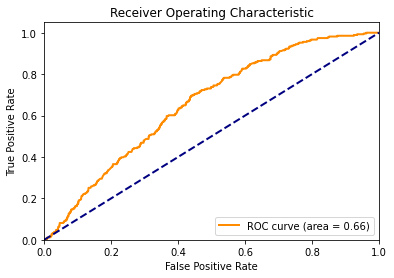


Random Over-Sampling:
Class distribution after over-sampling: Counter({0.0: 3757, 1.0: 3757})
              precision    recall  f1-score   support

         0.0       0.94      0.63      0.76      2485
         1.0       0.15      0.61      0.24       271

    accuracy                           0.63      2756
   macro avg       0.54      0.62      0.50      2756
weighted avg       0.86      0.63      0.71      2756



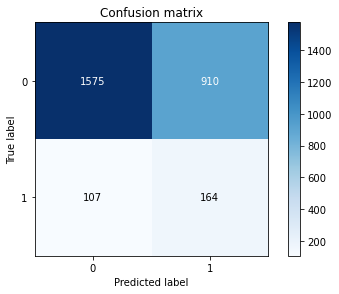

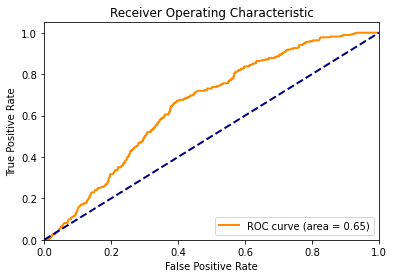


Model: Logistic Regression
--------------------------------------------------
No Resampling (Baseline):
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      2485
         1.0       0.00      0.00      0.00       271

    accuracy                           0.90      2756
   macro avg       0.45      0.50      0.47      2756
weighted avg       0.81      0.90      0.86      2756



d:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


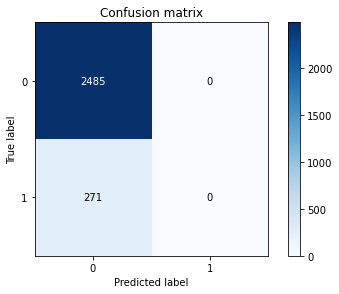

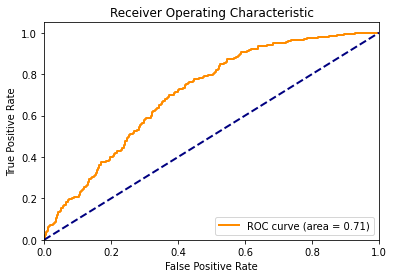


SMOTE Resampling:
Class distribution after SMOTE: Counter({0.0: 3757, 1.0: 3757})
              precision    recall  f1-score   support

         0.0       0.96      0.54      0.69      2485
         1.0       0.16      0.77      0.26       271

    accuracy                           0.57      2756
   macro avg       0.56      0.66      0.48      2756
weighted avg       0.88      0.57      0.65      2756



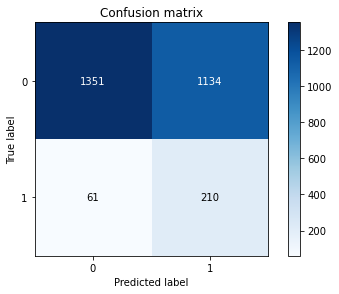

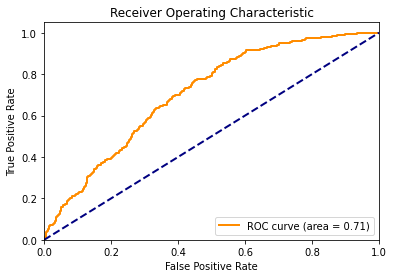


Random Under-Sampling:
Class distribution after under-sampling: Counter({0.0: 376, 1.0: 376})
              precision    recall  f1-score   support

         0.0       0.95      0.57      0.72      2485
         1.0       0.16      0.75      0.26       271

    accuracy                           0.59      2756
   macro avg       0.56      0.66      0.49      2756
weighted avg       0.88      0.59      0.67      2756



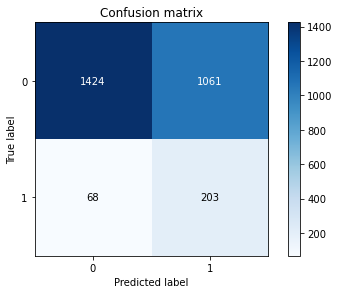

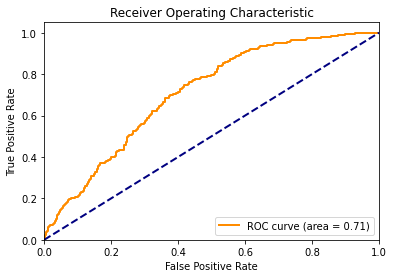


Random Over-Sampling:
Class distribution after over-sampling: Counter({0.0: 3757, 1.0: 3757})
              precision    recall  f1-score   support

         0.0       0.96      0.57      0.72      2485
         1.0       0.16      0.75      0.27       271

    accuracy                           0.59      2756
   macro avg       0.56      0.66      0.49      2756
weighted avg       0.88      0.59      0.67      2756



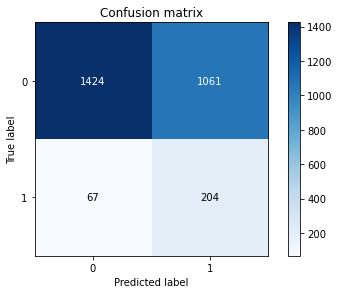

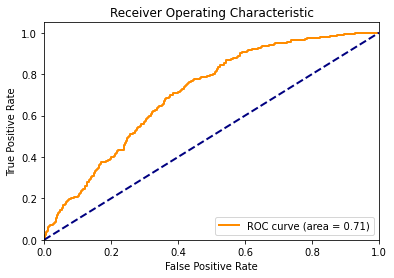

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from collections import Counter

# Create Generic function to fit data and display results/predictions
def fit_evaluate(models, X_train, X_test, y_train, y_test):
    for name, clf in models:
        print(f"Model: {name}")
        print("-" * 50)

        # No resampling (baseline)
        print("No Resampling (Baseline):")
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        print(classification_report(y_test, y_pred_test))
        plot_confusion_matrix(confusion_matrix(y_test, y_pred_test), classes=[0, 1])
        plot_roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        print()

        # Resampling with SMOTE
        print("SMOTE Resampling:")
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        print(f"Class distribution after SMOTE: {Counter(y_train_resampled)}")
        clf.fit(X_train_resampled, y_train_resampled)
        y_pred_test = clf.predict(X_test)
        print(classification_report(y_test, y_pred_test))
        plot_confusion_matrix(confusion_matrix(y_test, y_pred_test), classes=[0, 1])
        plot_roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        print()

        # Resampling with Random Under-Sampling
        print("Random Under-Sampling:")
        under_sampler = RandomUnderSampler(random_state=42)
        X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)
        print(f"Class distribution after under-sampling: {Counter(y_train_resampled)}")
        clf.fit(X_train_resampled, y_train_resampled)
        y_pred_test = clf.predict(X_test)
        print(classification_report(y_test, y_pred_test))
        plot_confusion_matrix(confusion_matrix(y_test, y_pred_test), classes=[0, 1])
        plot_roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        print()

        # Resampling with Random Over-Sampling
        print("Random Over-Sampling:")
        over_sampler = RandomOverSampler(random_state=42)
        X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train, y_train)
        print(f"Class distribution after over-sampling: {Counter(y_train_resampled)}")
        clf.fit(X_train_resampled, y_train_resampled)
        y_pred_test = clf.predict(X_test)
        print(classification_report(y_test, y_pred_test))
        plot_confusion_matrix(confusion_matrix(y_test, y_pred_test), classes=[0, 1])
        plot_roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        print()

        print("=" * 70)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


# Example usage
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
]
fit_evaluate(models, X_train, X_test, y_train, y_test)


* XGBoost Classifier * 

Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      2485
         1.0       0.06      0.01      0.01       271

    accuracy                           0.89      2756
   macro avg       0.48      0.50      0.48      2756
weighted avg       0.82      0.89      0.85      2756


Confusion Matrix: 



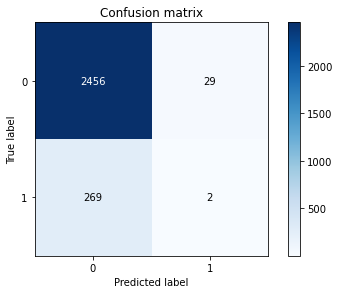

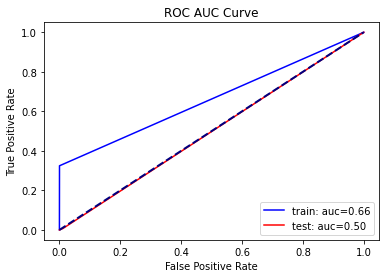

In [121]:
import xgboost as xgb

def fit_evaluate_gb(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)

    # make predictions for train data
    y_pred_train = clf.predict(X_train)

    # make predictions for test data
    y_pred_test = clf.predict(X_test)
    
    # print evaluation
    print("Test Set Evaluation:")
    print(classification_report(y_test, y_pred_test, zero_division=1))
    print('\nConfusion Matrix: \n')
    plot_confusion_matrix(confusion_matrix(y_test, y_pred_test), classes=[0, 1])
    plt.show()
    
    # Calculate ROC AUC for train and test sets
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)  # Use y_train, y_pred_train here
    auc_train = roc_auc_score(y_train, y_pred_train)  # Use y_train, y_pred_train here
    
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)  # Use y_test, y_pred_test here
    auc_test = roc_auc_score(y_test, y_pred_test)  # Use y_test, y_pred_test here
    
    # Plot ROC AUC curves
    plt.plot(fpr_train, tpr_train, color='Blue', label='train: auc=' + f'{auc_train:.2f}')
    plt.plot(fpr_test, tpr_test, color='Red', label='test: auc=' + f'{auc_test:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.show()


modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate_gb(modelXGB, X_train, X_test, y_train, y_test)

In [122]:
## building pipeline for hyperparameter tuning

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

# Create a pipeline
pipe = Pipeline([
  ('fs', SelectKBest()),
  ('clf', xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=9))
])

In [116]:
## hyper parameter tuning - grid search

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
# Define our search space for grid search
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1],
    'clf__max_depth': range(2, 4),
    'clf__colsample_bytree': [i/10.0 for i in range(2, 5)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [chi2],
    'fs__k': [2],
  }
]
# Define cross validation
kfold = KFold(n_splits=5)
# AUC and accuracy as score
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score), 'F1 score': 'f1_micro'}
# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)

# Fit grid search
xgb_model_clv_GS = grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [117]:
print(xgb_model_clv_GS.best_params_)

{'clf__colsample_bytree': 0.2, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__n_estimators': 150, 'fs__k': 2, 'fs__score_func': <function chi2 at 0x00000222D4D8B9D0>}


* XGBoost Classifier * 

Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      2485
         1.0       1.00      0.00      0.00       271

    accuracy                           0.90      2756
   macro avg       0.95      0.50      0.47      2756
weighted avg       0.91      0.90      0.86      2756


Confusion Matrix: 



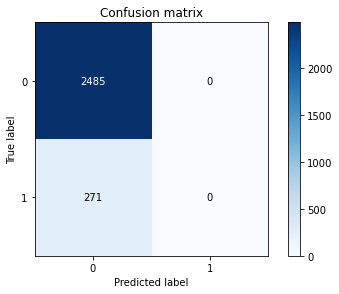

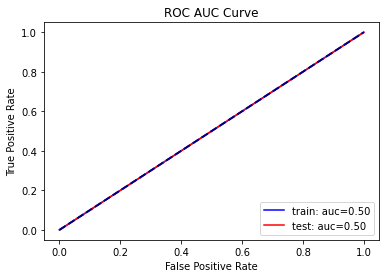

In [123]:
modelXGB = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=150,
 max_depth=2,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.2,
 objective= 'binary:logistic',
 eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate_gb(modelXGB, X_train, X_test, y_train, y_test)

The best it could do is Random forest using SMOTE which gives               
            precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      2485
         1.0       0.14      0.29      0.18       271

    accuracy                           0.75      2756

and auc score = 0.63